In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
output_dir = 'D:/Thesis/files_output_dir/output_utilization/'
road_data = pd.read_csv(output_dir + 'level1_road_history_workday_utilization.csv')

In [ ]:
road_data.head()

In [ ]:
road_data_selected= road_data[['road_id','time', 'avg_speed',
       'theta', 'volume', 'qc', 'vc', 'Uq', 'Uv', 'Uq_norm', 'Uv_norm',
       'theta_norm', 'utilization']]

# Filter the data for road_id 69753 and time in [48, 72, 108]
# filtered_data = road_data_selected[(road_data_selected['road_id'] == 69753) & (road_data_selected['time'].isin([48, 72, 108]))]
# filtered_data
road_data_selected[road_data_selected['road_id']== 69753]

In [4]:
# Define the time periods for morning, afternoon, and evening
morning_hours = range(8*6, 10*6)    # 8 AM to 10 AM
afternoon_hours = range(14*6, 17*6) # 2 PM to 5 PM
evening_hours = range(18*6, 20*6)   # 6 PM to 08 PM

# Create subsets for each time period
morning_data = road_data[road_data['time'].isin(morning_hours)]
afternoon_data = road_data[road_data['time'].isin(afternoon_hours)]
evening_data = road_data[road_data['time'].isin(evening_hours)]

# Aggregate the data to compute mean values for each period
morning_summary = morning_data[['Uq', 'Uv', 'Uq_norm', 'Uv_norm','theta_norm', 'utilization']].mean()
afternoon_summary = afternoon_data[['Uq', 'Uv', 'Uq_norm', 'Uv_norm','theta_norm','utilization']].mean()
evening_summary = evening_data[['Uq', 'Uv', 'Uq_norm', 'Uv_norm','theta_norm', 'utilization']].mean()

# Create a summary DataFrame to compare the results
summary_df = pd.DataFrame({
    'Period': ['Morning', 'Afternoon', 'Evening'],
    'Avg_Uq': [morning_summary['Uq'], afternoon_summary['Uq'], evening_summary['Uq']],
    'Avg_Uv': [morning_summary['Uv'], afternoon_summary['Uv'], evening_summary['Uv']],
    'Avg_Uq_norm': [morning_summary['Uq_norm'], afternoon_summary['Uq_norm'], evening_summary['Uq_norm']],
    'Avg_Uv_norm': [morning_summary['Uv_norm'], afternoon_summary['Uv_norm'], evening_summary['Uv_norm']],
    'Avg_theta_norm': [morning_summary['theta_norm'], afternoon_summary['theta_norm'], evening_summary['theta_norm']],
    'Avg_Utilization': [morning_summary['utilization'], afternoon_summary['utilization'], evening_summary['utilization']]
})


In [5]:
summary_df

,Period,Avg_Uq,Avg_Uv,Avg_Uq_norm,Avg_Uv_norm,Avg_theta_norm,Avg_Utilization
0,Morning,1.035036,0.844871,0.305778,0.282877,0.646057,0.331315
1,Afternoon,0.710188,0.898173,0.147875,0.300723,0.643036,0.280036
2,Evening,0.873221,0.876262,0.227122,0.293387,0.642945,0.301130


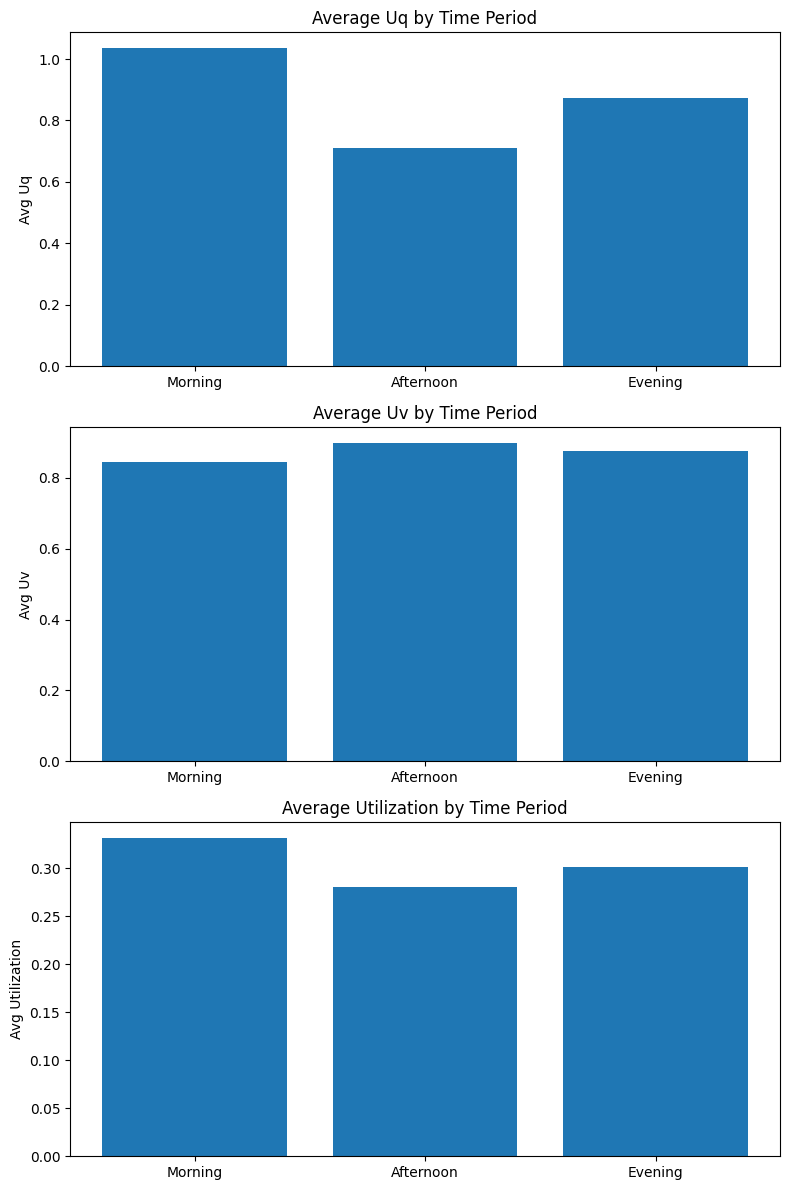

In [6]:
# Set up the figure and axes
fig, ax = plt.subplots(3, 1, figsize=(8, 12))

# Plot Avg_Uq
ax[0].bar(summary_df['Period'], summary_df['Avg_Uq'])
ax[0].set_title('Average Uq by Time Period')
ax[0].set_ylabel('Avg Uq')

# Plot Avg_Uv
ax[1].bar(summary_df['Period'], summary_df['Avg_Uv'])
ax[1].set_title('Average Uv by Time Period')
ax[1].set_ylabel('Avg Uv')

# Plot Avg_Utilization
ax[2].bar(summary_df['Period'], summary_df['Avg_Utilization'])
ax[2].set_title('Average Utilization by Time Period')
ax[2].set_ylabel('Avg Utilization')

# Adjust layout
plt.tight_layout()
plt.show()

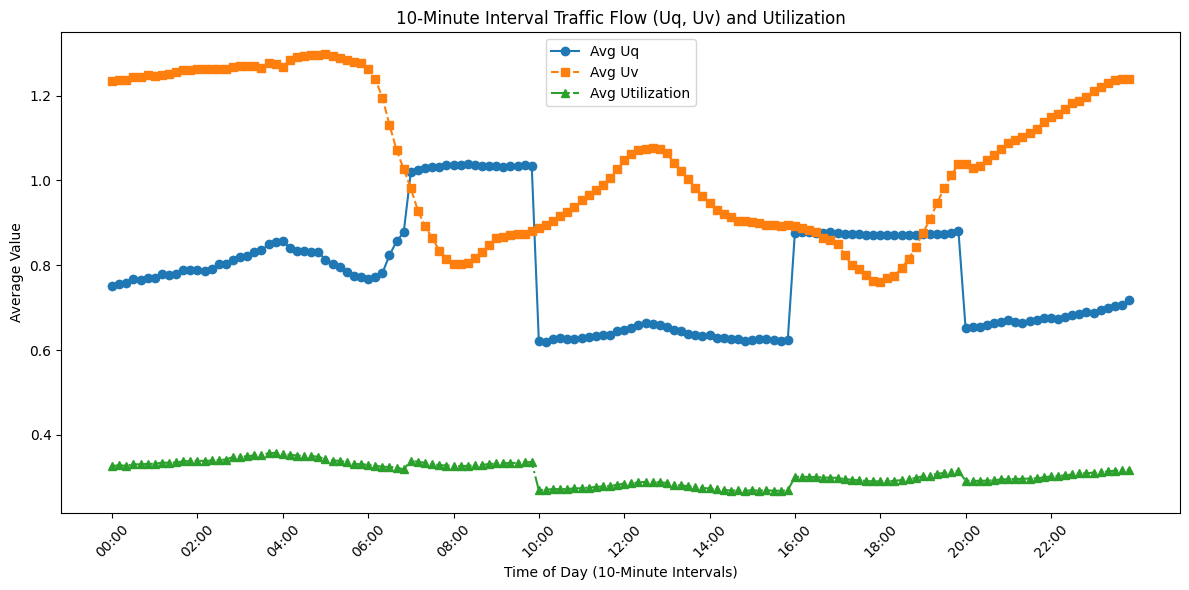

In [7]:
# Grouping the data by time to compute the average Uq, Uv, and utilization for each hour
hourly_summary = road_data.groupby('time')[['Uq', 'Uv', 'utilization']].mean().reset_index()

# Convert 10-minute intervals into readable time format (00:00, 00:10, ..., 23:50)
hour_labels = [(f"{int(t//6):02}:{(t%6)*10:02}") for t in hourly_summary['time']]

# Plotting the hourly Uq, Uv, and utilization with adjusted time labels
plt.figure(figsize=(12, 6))

# Plot Uq with a circle marker
plt.plot(hourly_summary['time'], hourly_summary['Uq'], marker='o', label='Avg Uq', linestyle='-')
# Plot Uv with a square marker
plt.plot(hourly_summary['time'], hourly_summary['Uv'], marker='s', label='Avg Uv', linestyle='--')
# Plot Utilization with a triangle marker
plt.plot(hourly_summary['time'], hourly_summary['utilization'], marker='^', label='Avg Utilization', linestyle='-.')


# Adding labels and title
plt.title('10-Minute Interval Traffic Flow (Uq, Uv) and Utilization')
plt.xlabel('Time of Day (10-Minute Intervals)')
plt.ylabel('Average Value')

# Set custom x-axis labels
plt.xticks(hourly_summary['time'][::12], hour_labels[::12], rotation=45)  # Show every 2-hour label

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [8]:
# Step 1: Calculate the average utilization for each road segment
road_utilization = road_data.groupby('road_id')['utilization'].mean().reset_index()

# Step 2: Set thresholds for high and low utilization (e.g., top 10% and bottom 10%)
high_threshold = road_utilization['utilization'].quantile(0.9)  # Top 10%
low_threshold = road_utilization['utilization'].quantile(0.1)   # Bottom 10%

# Step 3: Identify roads with high and low utilization
high_utilization_roads = road_utilization[road_utilization['utilization'] >= high_threshold]
low_utilization_roads = road_utilization[road_utilization['utilization'] <= low_threshold]

# Display the identified road segments
print("High Utilization Roads:\n", high_utilization_roads)
print("Low Utilization Roads:\n", low_utilization_roads)


High Utilization Roads:
       road_id  utilization
7         210     0.410275
22        310     0.392393
23        311     0.398336
26        314     0.390339
35        334     0.427928
...       ...          ...
4362    79295     0.481970
4371    79546     0.386871
4380    79563     0.388370
4382    79565     0.390181
4394    79577     0.409941

[456 rows x 2 columns]
Low Utilization Roads:
       road_id  utilization
2         131     0.162243
3         179     0.153372
31        326     0.159432
38        337     0.156251
39        338     0.164208
...       ...          ...
4554    81552     0.154788
4556    81554     0.163800
4557    81555     0.164777
4558    81556     0.158391
4559    81557     0.162792

[456 rows x 2 columns]


In [9]:
# Sorting the DataFrame by the 'Utilization_Percentage' column in descending order
sorted_df = high_utilization_roads.sort_values(by='utilization', ascending=False)
styled_df = sorted_df.style.set_caption("High Utilization Roads").highlight_max(subset="utilization", color="lightgreen")

styled_df

,road_id,utilization
2047,39672,0.684215
643,12410,0.663905
1925,39227,0.624188
3337,61026,0.621371
2070,39695,0.618557
544,12307,0.615350
980,18966,0.607364
2120,39745,0.607180
2431,47675,0.603883
2430,47674,0.602913


In [10]:

# Sorting the DataFrame by the 'Utilization_Percentage' column in descending order
sorted_df = low_utilization_roads.sort_values(by='utilization', ascending=True)
styled_df = sorted_df.style.set_caption("Low Utilization Roads").highlight_max(subset="utilization", color="lightgreen")

styled_df

,road_id,utilization
3854,69753,0.127700
4130,74382,0.129992
1511,30972,0.132044
3690,65269,0.134342
3667,65088,0.141963
2996,57011,0.142431
1489,30264,0.143524
2994,57006,0.144896
2841,52816,0.145001
3847,69731,0.145966


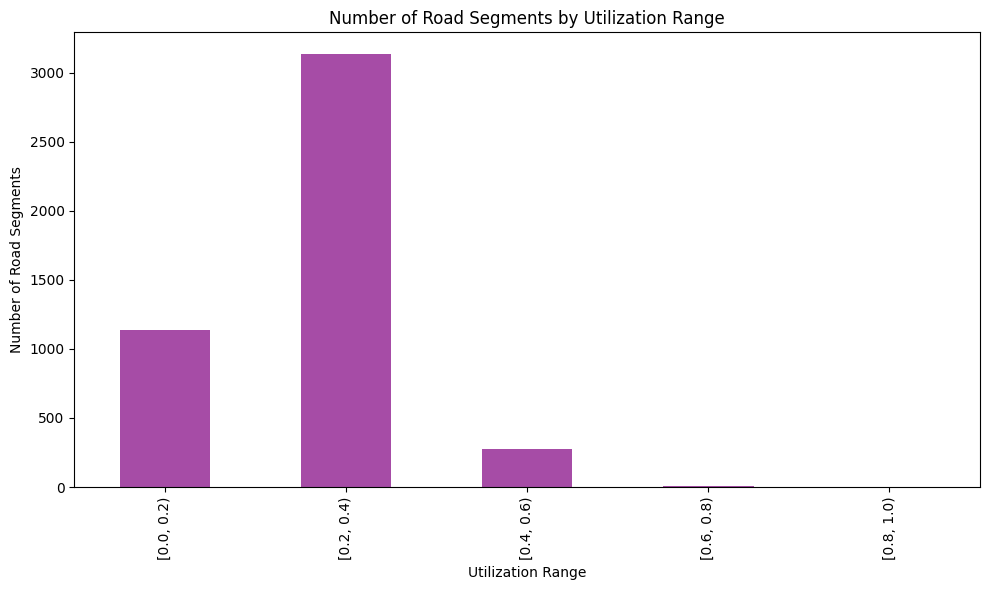

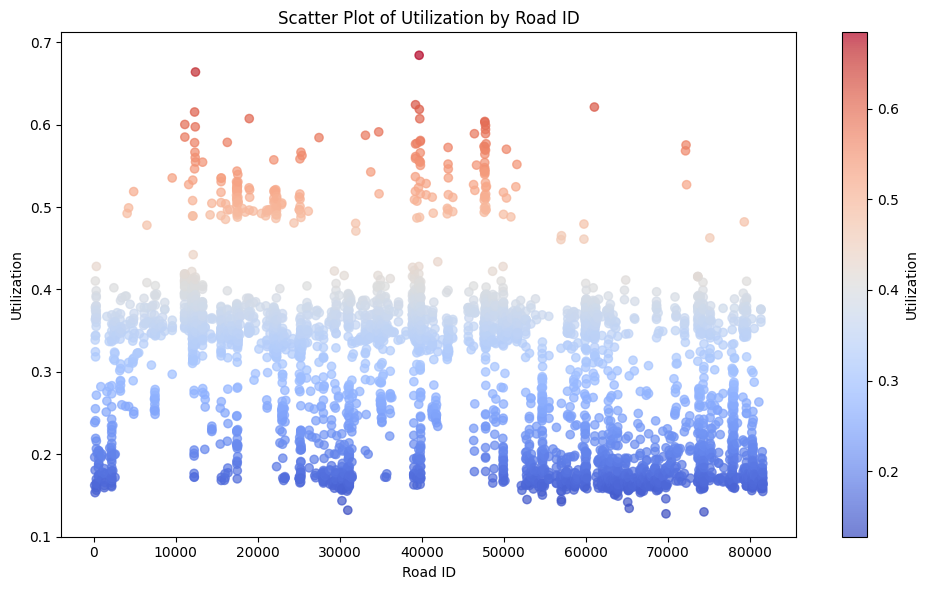

In [11]:
# Preparing data for different visualizations

# Combine high and low utilization data into a single DataFrame
road_utilization['category'] = 'Normal'  # Default category
road_utilization.loc[road_utilization['utilization'] >= high_threshold, 'category'] = 'High Utilization'
road_utilization.loc[road_utilization['utilization'] <= low_threshold, 'category'] = 'Low Utilization'


# 4. Bar Plot by Utilization Range
utilization_bins = pd.cut(road_utilization['utilization'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], right=False)
utilization_counts = utilization_bins.value_counts().sort_index()
plt.figure(figsize=(10, 6))
utilization_counts.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Number of Road Segments by Utilization Range')
plt.xlabel('Utilization Range')
plt.ylabel('Number of Road Segments')
plt.tight_layout()
plt.show()

# 5. Scatter Plot (Utilization vs. Road IDs)
plt.figure(figsize=(10, 6))
plt.scatter(road_utilization['road_id'], road_utilization['utilization'], c=road_utilization['utilization'], cmap='coolwarm', alpha=0.7)
plt.title('Scatter Plot of Utilization by Road ID')
plt.xlabel('Road ID')
plt.ylabel('Utilization')
plt.colorbar(label='Utilization')
plt.tight_layout()
plt.show()
